In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
sys.path.append("../src")

In [2]:
preselection_configs = [file for file in os.listdir("/afs/desy.de/user/s/spatarod/QUBO-V2/configuration/preselection/") 
                        if "c_" in file]
qubo_configs = ['VQE_IdealQasmSim_3q_TwoLocal_NFT.yaml',
                'VQE_IdealQasmSim_5q_TwoLocal_NFT.yaml',
                'VQE_IdealQasmSim_7q_TwoLocal_NFT.yaml',
                'VQE_IdealQasmSim_10q_TwoLocal_NFT.yaml',
                'VQE_IdealQasmSim_12q_TwoLocal_NFT.yaml',
                'VQE_IdealQasmSim_16q_TwoLocal_NFT.yaml']
qubo_configs

['VQE_IdealQasmSim_3q_TwoLocal_NFT.yaml',
 'VQE_IdealQasmSim_5q_TwoLocal_NFT.yaml',
 'VQE_IdealQasmSim_7q_TwoLocal_NFT.yaml',
 'VQE_IdealQasmSim_10q_TwoLocal_NFT.yaml',
 'VQE_IdealQasmSim_12q_TwoLocal_NFT.yaml',
 'VQE_IdealQasmSim_16q_TwoLocal_NFT.yaml']

In [3]:
def hms_string(sec_elapsed):
    """Nicely formatted time string.
    :param sec_elapsed time in ms
    :return
    hh:mm:ss.msms
    """
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

In [4]:
prefix = "/nfs/dust/luxe/user/spatarod/towards_paper/e-laser/phase-0/gpc/"
xi = 5.0
preselection = "-c_4"

minimum_energy_3_q = []
minimum_energy_5_q = []
minimum_energy_7_q = []
minimum_energy_10_q = []
minimum_energy_12_q = []
minimum_energy_16_q = []

iteration_for_95_energy_3_q = []
iteration_for_95_energy_5_q = []
iteration_for_95_energy_7_q = []
iteration_for_95_energy_10_q = []
iteration_for_95_energy_12_q = []
iteration_for_95_energy_16_q = []

iteration_time_3_q = []
iteration_time_5_q = []
iteration_time_7_q = []
iteration_time_10_q = []
iteration_time_12_q = []
iteration_time_16_q = []

solving_time_subqubos_3q = []
solving_time_subqubos_5q = []
solving_time_subqubos_7q = []
solving_time_subqubos_10q = []
solving_time_subqubos_12q = []
solving_time_subqubos_16q = []

solving_success_subqubos_3q = []
solving_success_subqubos_5q = []
solving_success_subqubos_7q = []
solving_success_subqubos_10q = []
solving_success_subqubos_12q = []
solving_success_subqubos_16q = []


  
threshold = 0.95


for folder in os.listdir(f"{prefix}{xi}/smeared/"):
    if preselection in folder:
        for qubo in os.listdir(f"{prefix}{xi}/smeared/{folder}"):
            if "_".join(qubo.split("_")[1:]) in [qubo_config.split(".")[0] for qubo_config in qubo_configs]:
                try:
                    data = np.load(f"{prefix}{xi}/smeared/{folder}/{qubo}/qubo_log.npy", allow_pickle=True)

                except:
                    pass
                if "3q" in qubo:
                    if len(data[()]["hamiltonian"][0][0])!=3:
                        continue
                        
                    timed = 0
                    minimum_energy_3_q.append(data[()]["truth minimum energy"])
                    
                    for solve_success, time_subqubo in zip(data[()]["compare to analytical solution"].values(),
                                                           data[()]["time tracking subQUBOs"].values()):
                        solving_success_subqubos_3q.append(solve_success)
                        solving_time_subqubos_3q.append(time_subqubo)
                        
                    for iteration, energy, time in zip(data[()]["energy"].keys(), 
                                                       data[()]["energy"].values(),
                                                       data[()]["time tracking qubo iteration"].values()):


                        timed += time
                        if energy / data[()]["truth minimum energy"] > threshold:
                            iteration_for_95_energy_3_q.append(int(iteration))
                            iteration_time_3_q.append(timed)                  
                            break
                            
                if "5q" in qubo:  
                    if len(data[()]["hamiltonian"][0][0])!= 5:
                        continue
                    timed = 0
                    minimum_energy_5_q.append(data[()]["truth minimum energy"])
                    
                    for solve_success, time_subqubo in zip(data[()]["compare to analytical solution"].values(),
                                                           data[()]["time tracking subQUBOs"].values()):
                        solving_success_subqubos_5q.append(solve_success)
                        solving_time_subqubos_5q.append(time_subqubo)
                        
                    for iteration, energy, time in zip(data[()]["energy"].keys(), 
                                                       data[()]["energy"].values(),
                                                       data[()]["time tracking qubo iteration"].values()):


                        timed += time
                        if energy / data[()]["truth minimum energy"] > threshold:
                            iteration_for_95_energy_5_q.append(int(iteration))
                            iteration_time_5_q.append(timed)                  
                            break
                if "7q" in qubo:
                    if len(data[()]["hamiltonian"][0][0])!= 7:
                        continue                   

                    timed = 0
                    minimum_energy_7_q.append(data[()]["truth minimum energy"])
                    
                    for solve_success, time_subqubo in zip(data[()]["compare to analytical solution"].values(),
                                                           data[()]["time tracking subQUBOs"].values()):
                        solving_success_subqubos_7q.append(solve_success)
                        solving_time_subqubos_7q.append(time_subqubo)
                        
                    for iteration, energy, time in zip(data[()]["energy"].keys(), 
                                                       data[()]["energy"].values(),
                                                       data[()]["time tracking qubo iteration"].values()):


                        timed += time
                        if energy / data[()]["truth minimum energy"] > threshold:
                            iteration_for_95_energy_7_q.append(int(iteration))
                            iteration_time_7_q.append(timed)                  
                            break                            
                if "10q" in qubo:
                    if len(data[()]["hamiltonian"][0][0])!= 10:
                        continue
                        
                    minimum_energy_10_q.append(data[()]["truth minimum energy"])   
                    timed = 0
                    
                    for solve_success, time_subqubo in zip(data[()]["compare to analytical solution"].values(),
                                                           data[()]["time tracking subQUBOs"].values()):
                        solving_success_subqubos_10q.append(solve_success)
                        solving_time_subqubos_10q.append(time_subqubo)
                        
                    for iteration, energy, time in zip(data[()]["energy"].keys(), 
                                                       data[()]["energy"].values(),
                                                       data[()]["time tracking qubo iteration"].values()):


                        timed += time
                        if energy / data[()]["truth minimum energy"] > threshold:
                            iteration_for_95_energy_10_q.append(int(iteration))
                            iteration_time_10_q.append(timed)                  
                            break
                if "12q" in qubo:
                    if len(data[()]["hamiltonian"][0][0])!= 12:
                        continue
                    minimum_energy_12_q.append(data[()]["truth minimum energy"])   
                    timed = 0
                    minimum_energy_12_q.append(data[()]["truth minimum energy"])
                    
                    for solve_success, time_subqubo in zip(data[()]["compare to analytical solution"].values(),
                                                           data[()]["time tracking subQUBOs"].values()):
                        solving_success_subqubos_12q.append(solve_success)
                        solving_time_subqubos_12q.append(time_subqubo)
                        
                    for iteration, energy, time in zip(data[()]["energy"].keys(), 
                                                       data[()]["energy"].values(),
                                                       data[()]["time tracking qubo iteration"].values()):


                        timed += time
                        if energy / data[()]["truth minimum energy"] > threshold:
                            iteration_for_95_energy_12_q.append(int(iteration))
                            iteration_time_12_q.append(timed)                  
                            break 
                      
                if "16q" in qubo:
                    timed = 0
                    minimum_energy_5_q.append(data[()]["truth minimum energy"])
                    
                    for solve_success, time_subqubo in zip(data[()]["compare to analytical solution"].values(),
                                                           data[()]["time tracking subQUBOs"].values()):
                        solving_success_subqubos_16q.append(solve_success)
                        solving_time_subqubos_16q.append(time_subqubo)
                        
                    for iteration, energy, time in zip(data[()]["energy"].keys(), 
                                                       data[()]["energy"].values(),
                                                       data[()]["time tracking qubo iteration"].values()):


                        timed += time
                        if energy / data[()]["truth minimum energy"] > threshold:
                            iteration_for_95_energy_16_q.append(int(iteration))
                            iteration_time_16_q.append(timed)                  
                            break

In [5]:
print("Convergence time (reaching < 95% ground state energy) in hh:mm:ss.msms")
print(f"Sub-QUBO size = 3: {hms_string(np.mean(iteration_time_3_q))} +/- {hms_string(np.std(iteration_time_3_q))} after approximately {1 + np.around(np.mean(iteration_for_95_energy_3_q), 3)} iterations")
print(f"Sub-QUBO size = 5: {hms_string(np.mean(iteration_time_5_q))} +/- {hms_string(np.std(iteration_time_5_q))} after approximately {1 + np.around(np.mean(iteration_for_95_energy_5_q), 3)} iterations")
print(f"Sub-QUBO size = 7: {hms_string(np.mean(iteration_time_7_q))} +/- {hms_string(np.std(iteration_time_7_q))} after approximately {1 + np.around(np.mean(iteration_for_95_energy_7_q), 3)} iterations")
print(f"Sub-QUBO size = 10: {hms_string(np.mean(iteration_time_10_q))} +/- {hms_string(np.std(iteration_time_10_q))} after approximately {1 + np.around(np.mean(iteration_for_95_energy_10_q), 3)} iterations")
print(f"Sub-QUBO size = 12: {hms_string(np.mean(iteration_time_12_q))} +/- {hms_string(np.std(iteration_time_12_q))} after approximately {1 + np.around(np.mean(iteration_for_95_energy_12_q), 3)} iterations")
# print(f"Sub-QUBO size = 16: {hms_string(np.mean(iteration_time_16_q))} +/- {hms_string(np.std(iteration_time_16_q))} after approximately {1 + np.around(np.mean(iteration_for_95_energy_12_q), 3)} iterations")

Convergence time (reaching < 95% ground state energy) in hh:mm:ss.msms
Sub-QUBO size = 3: 9:10:41.72 +/- 4:11:48.79 after approximately 2.0 iterations
Sub-QUBO size = 5: 5:03:25.23 +/- 1:19:08.70 after approximately 2.0 iterations
Sub-QUBO size = 7: 4:56:06.96 +/- 2:24:33.08 after approximately 2.0 iterations
Sub-QUBO size = 10: 4:32:51.08 +/- 0:45:23.30 after approximately 2.0 iterations
Sub-QUBO size = 12: 6:06:38.58 +/- 1:12:36.70 after approximately 3.0 iterations


In [6]:
subQUBO_size = [3, 5, 7, 10, 12]

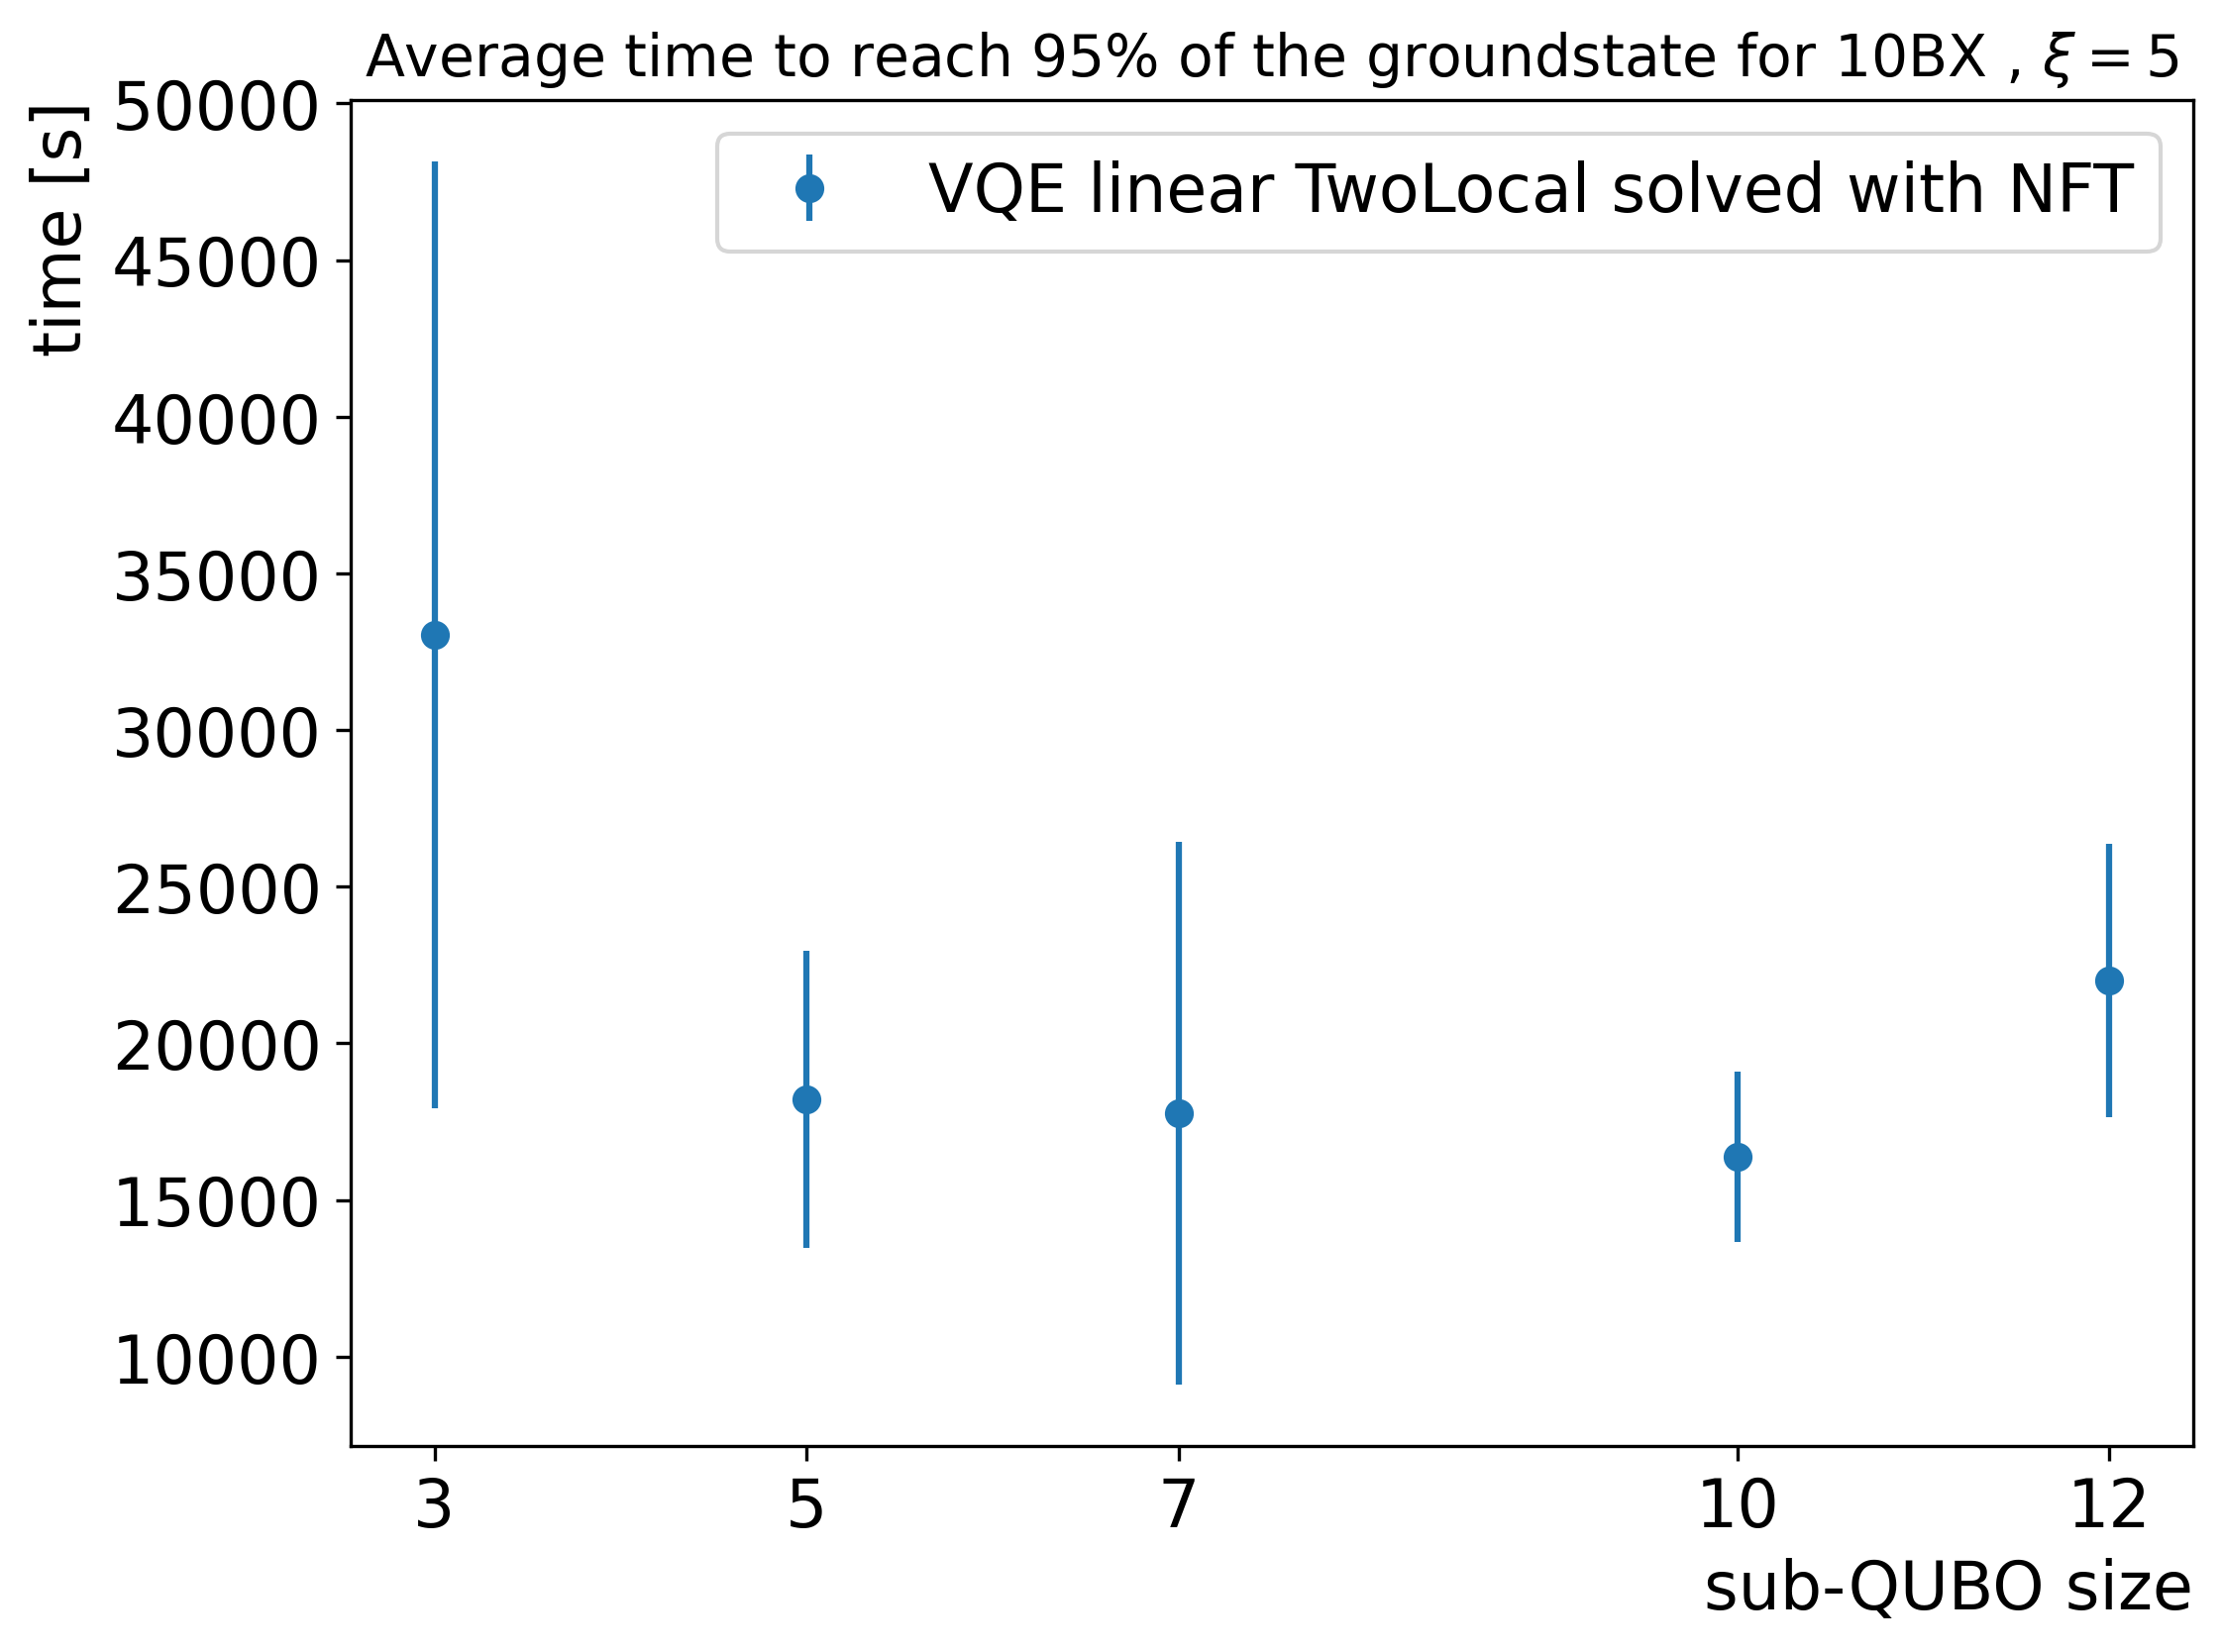

In [7]:
plt.figure(figsize=(8,6), dpi=300)
plt.errorbar(x=subQUBO_size,
             y=[np.mean(array) for array in [iteration_time_3_q,
                                             iteration_time_5_q,
                                             iteration_time_7_q,
                                             iteration_time_10_q,
                                             iteration_time_12_q]],
             yerr=[np.std(array) for array in [iteration_time_3_q,
                                               iteration_time_5_q,
                                               iteration_time_7_q,
                                               iteration_time_10_q,
                                               iteration_time_12_q]],
            label="VQE linear TwoLocal solved with NFT",
            linestyle="",
            marker="o")
plt.title(r"Average time to reach 95% of the groundstate for 10BX , $\xi=5$", fontsize=14)  
plt.legend(loc="best", fontsize=16)
plt.xticks([3, 5, 7, 10, 12], fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("sub-QUBO size", fontsize=16, loc="right")
plt.ylabel("time [s]", fontsize=16, loc="top")
plt.savefig("average_time.pdf", bbox_inches='tight')

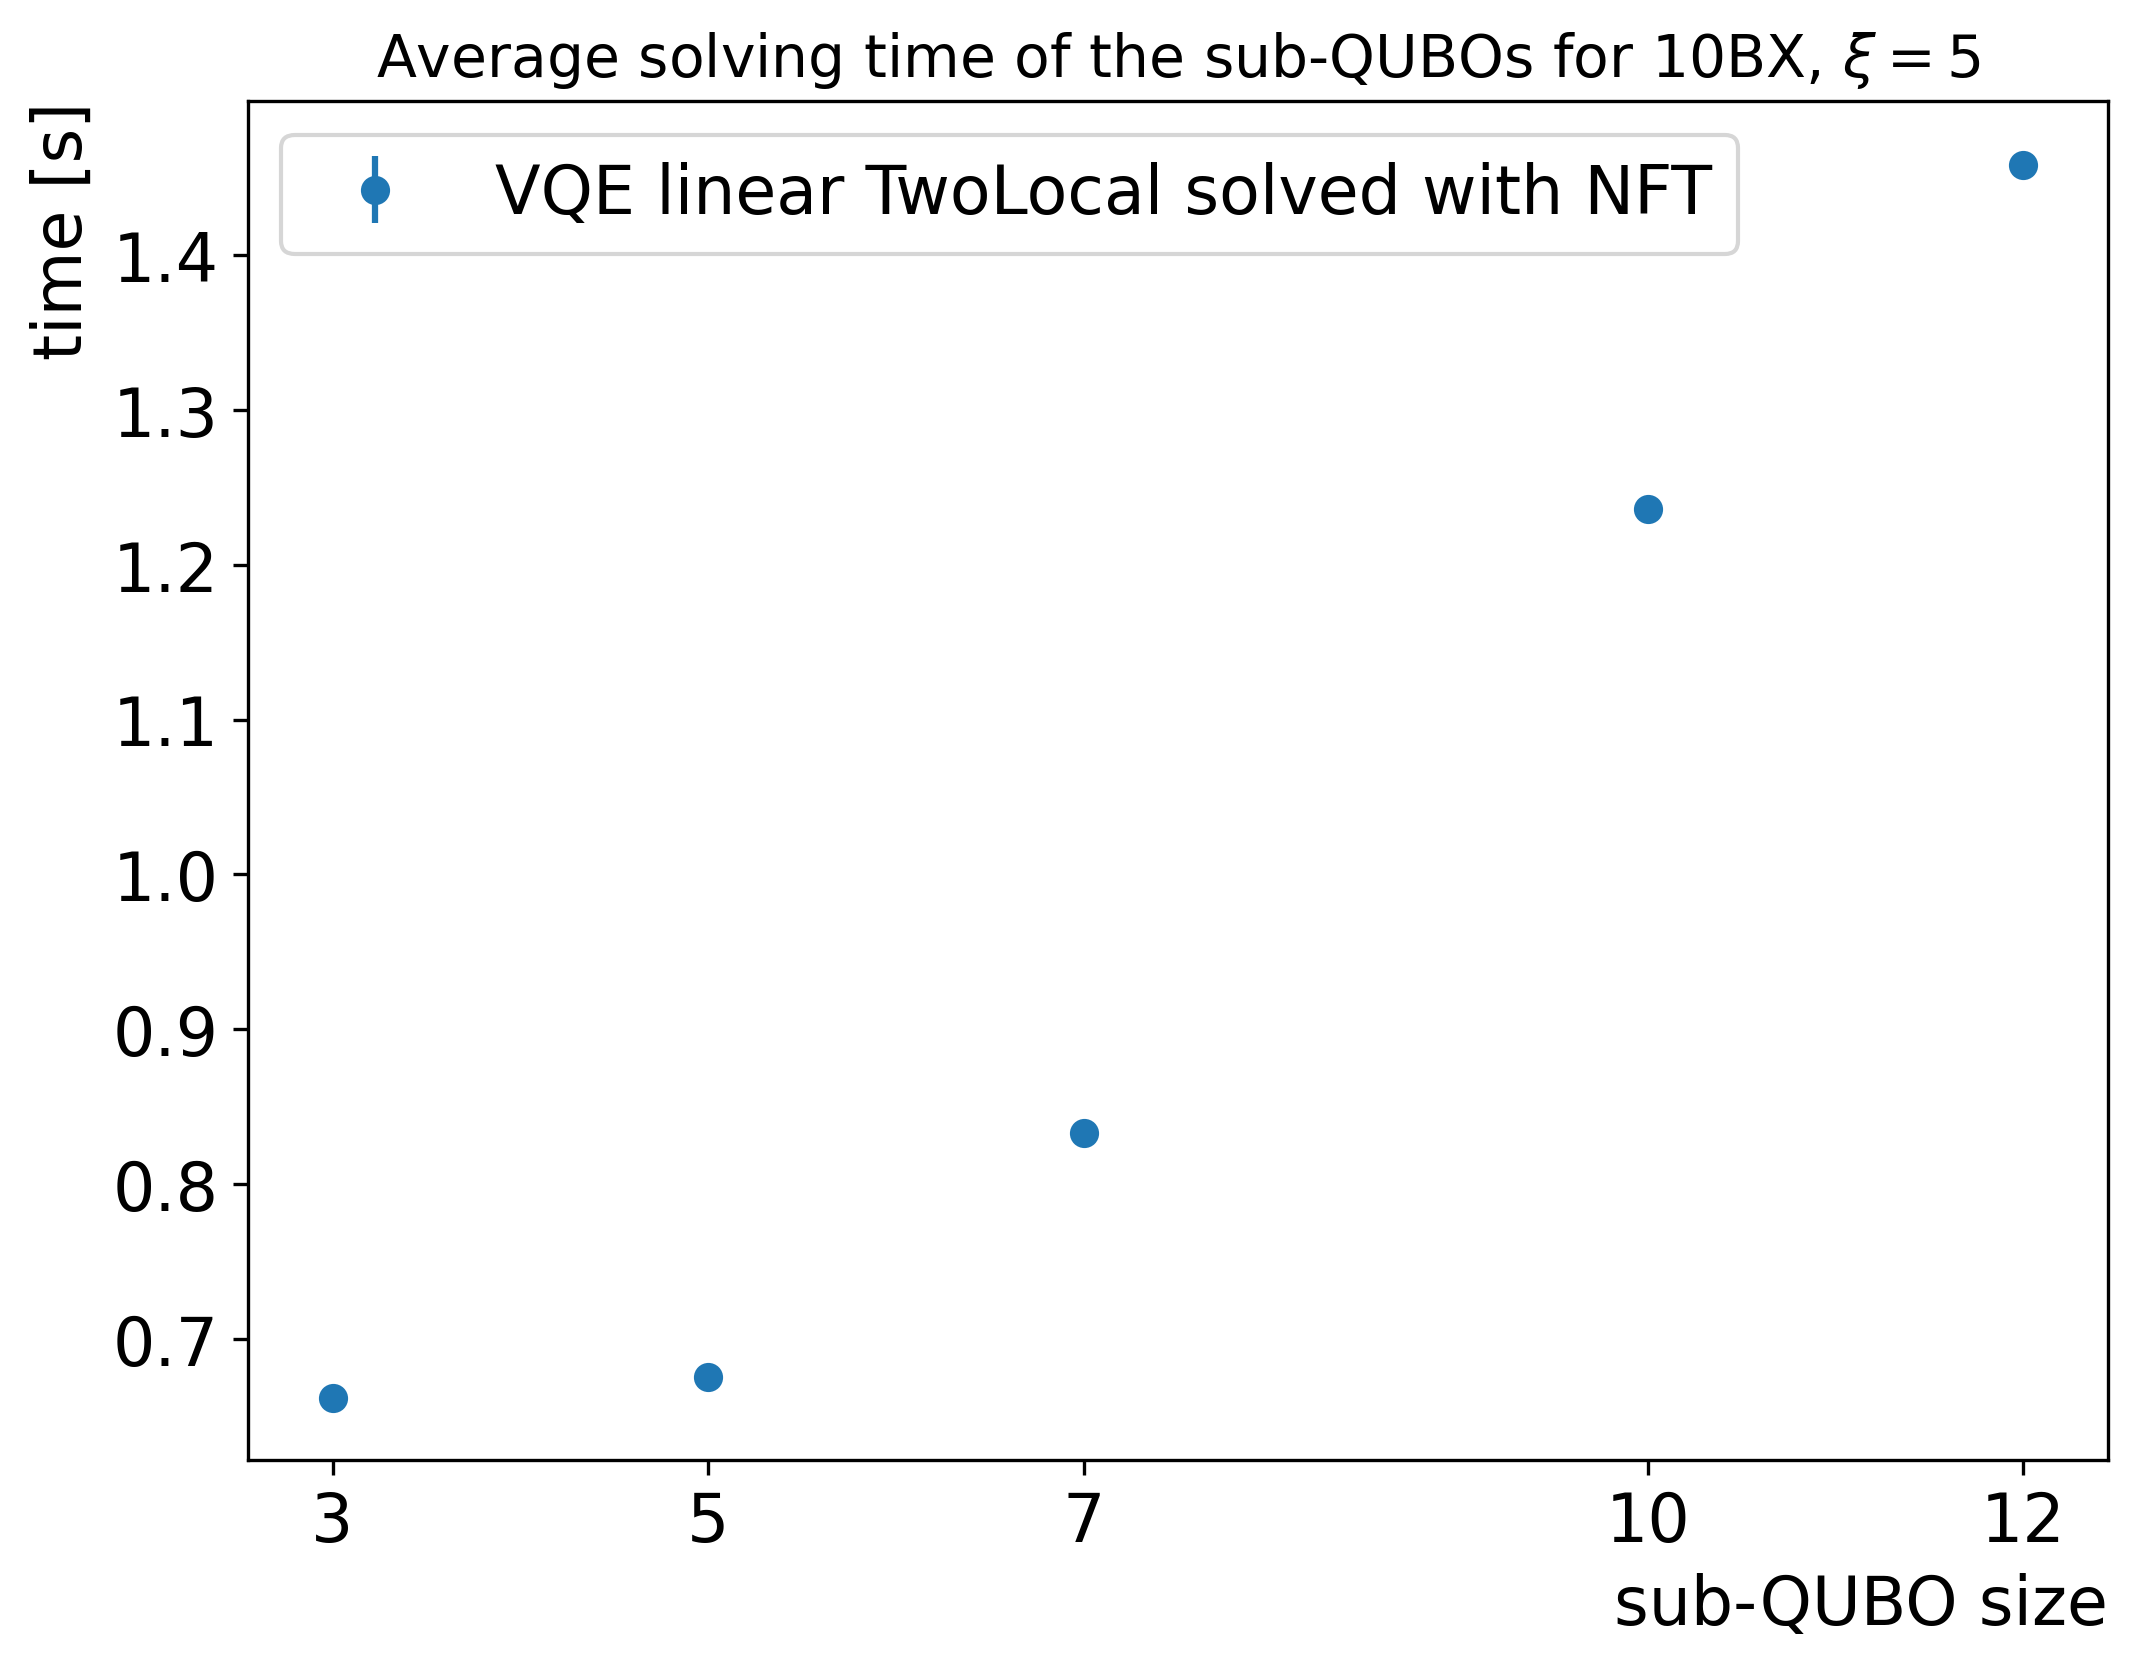

In [8]:
plt.figure(figsize=(8,6), dpi=300)
plt.errorbar(x=subQUBO_size,
             y=[np.mean(array) for array in [solving_time_subqubos_3q,
                                             solving_time_subqubos_5q,
                                             solving_time_subqubos_7q,
                                             solving_time_subqubos_10q,
                                             solving_time_subqubos_12q]],
             yerr=[np.std(array)*1/np.sqrt(len(array)) for array in [solving_time_subqubos_3q,
                                               solving_time_subqubos_5q,
                                               solving_time_subqubos_7q,
                                               solving_time_subqubos_10q,
                                               solving_time_subqubos_12q]],
            label="VQE linear TwoLocal solved with NFT",
            linestyle="",
            marker="o")
plt.title(r"Average solving time of the sub-QUBOs for 10BX, $\xi=5$", fontsize=14)  
plt.legend(loc="upper left", fontsize=16)
plt.xticks([3, 5, 7, 10, 12], fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("sub-QUBO size", fontsize=16, loc="right")
plt.ylabel("time [s]", fontsize=16, loc="top")
plt.savefig("average_time_subQUBO.pdf", bbox_inches='tight')

In [9]:
solving_success_subqubo7q_replace = []
for value in solving_success_subqubos_7q:
    if type(value) == bool:
        solving_success_subqubo7q_replace.append(value)
    else:
        if value.all():
            solving_success_subqubo7q_replace.append(True)
        else:
            solving_success_subqubo7q_replace.append(False)

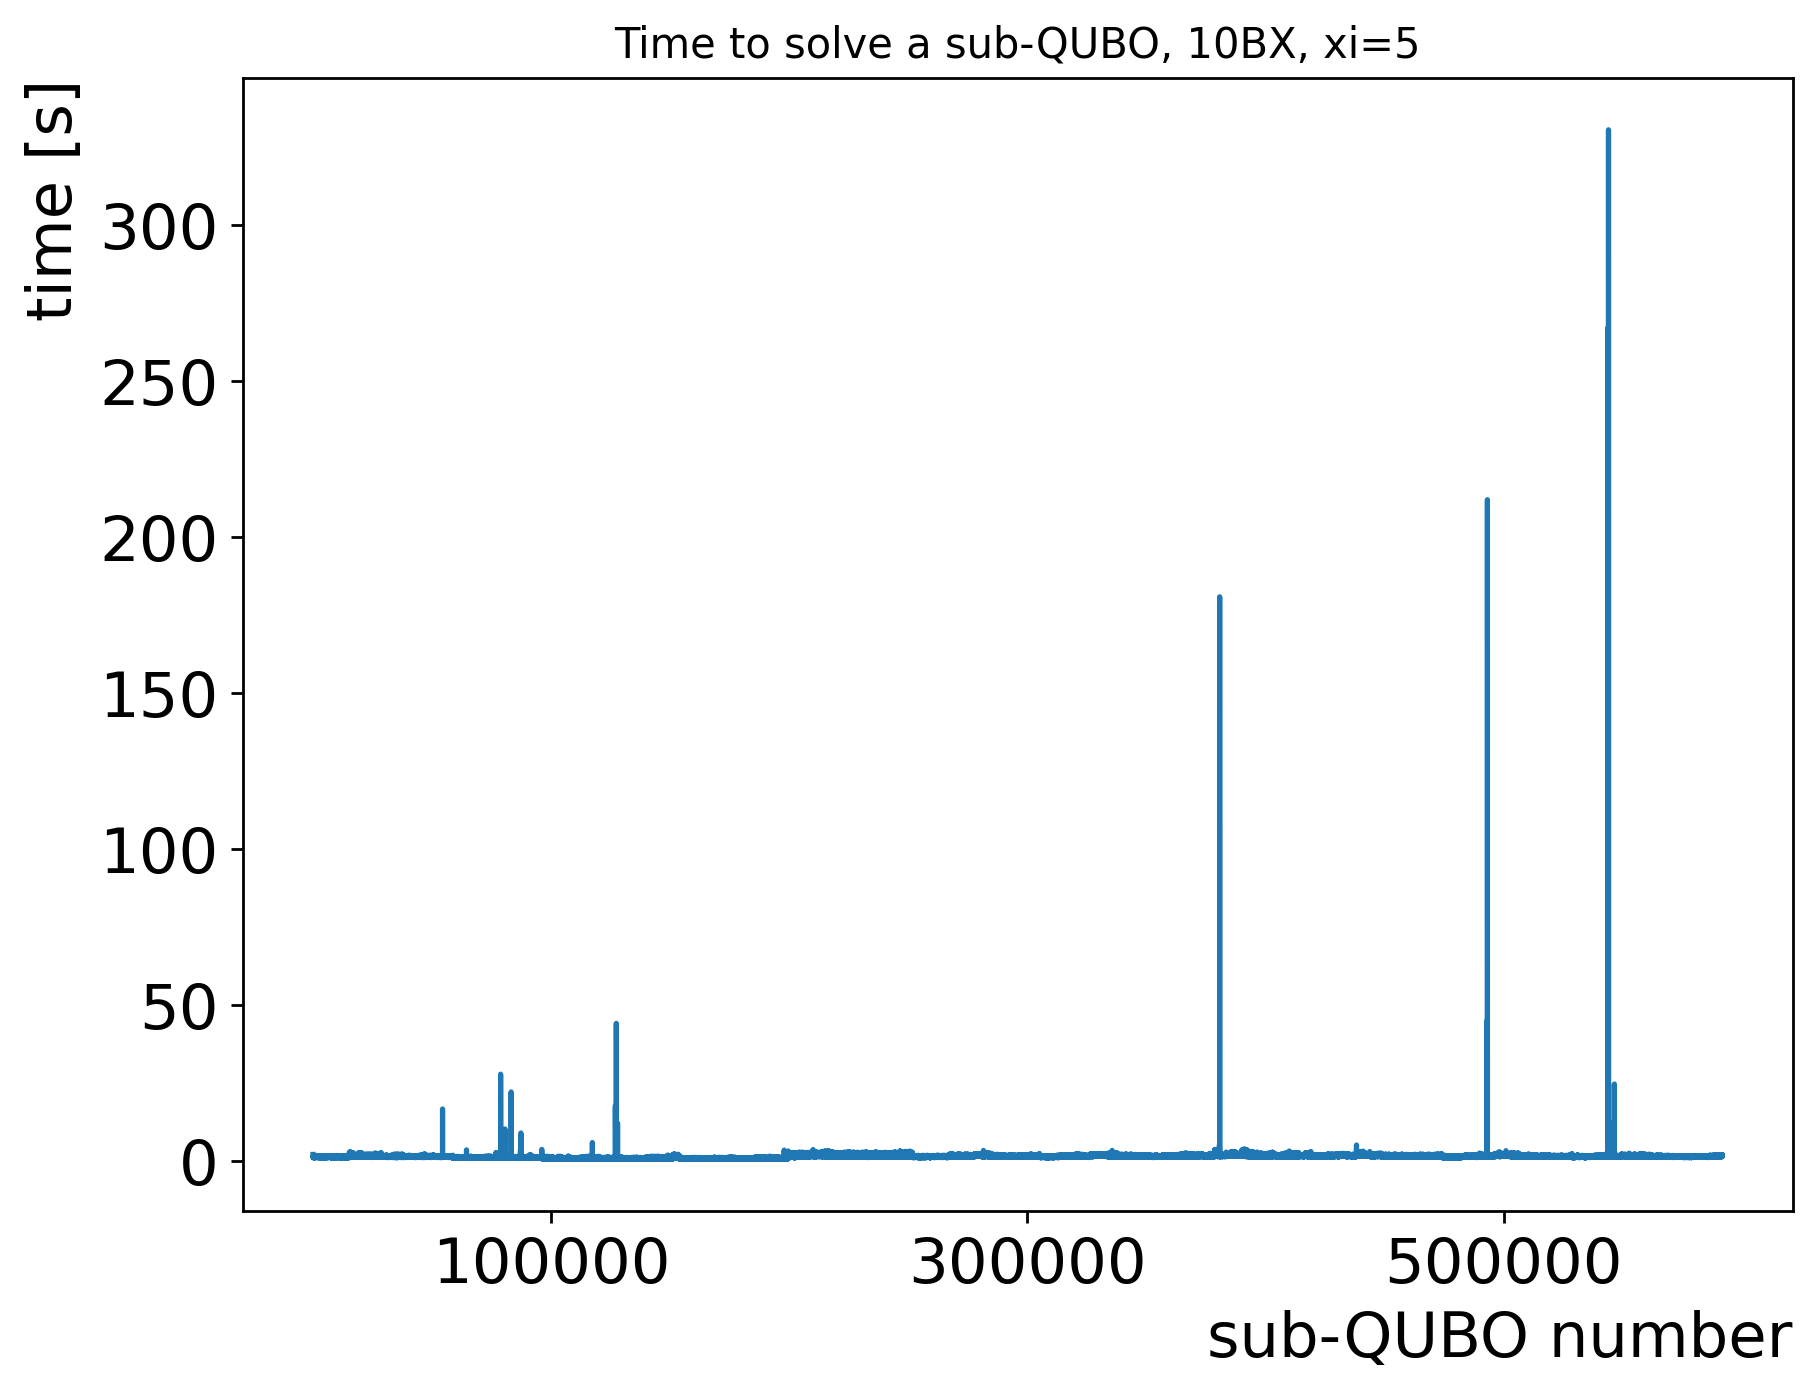

In [13]:
plt.figure(figsize=(8,6), dpi=250)
plt.plot([i for i in range(len(solving_time_subqubos_12q))], solving_time_subqubos_12q)
plt.title("Time to solve a sub-QUBO, 10BX, xi=5")
plt.xlabel("sub-QUBO number", fontsize=18, loc="right")
plt.xticks([1e5, 3e5, 5e5],fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("time [s]", fontsize=18, loc="top")
plt.savefig("sub-QUBO_solving_time_10BX.pdf", bbox_inches='tight')

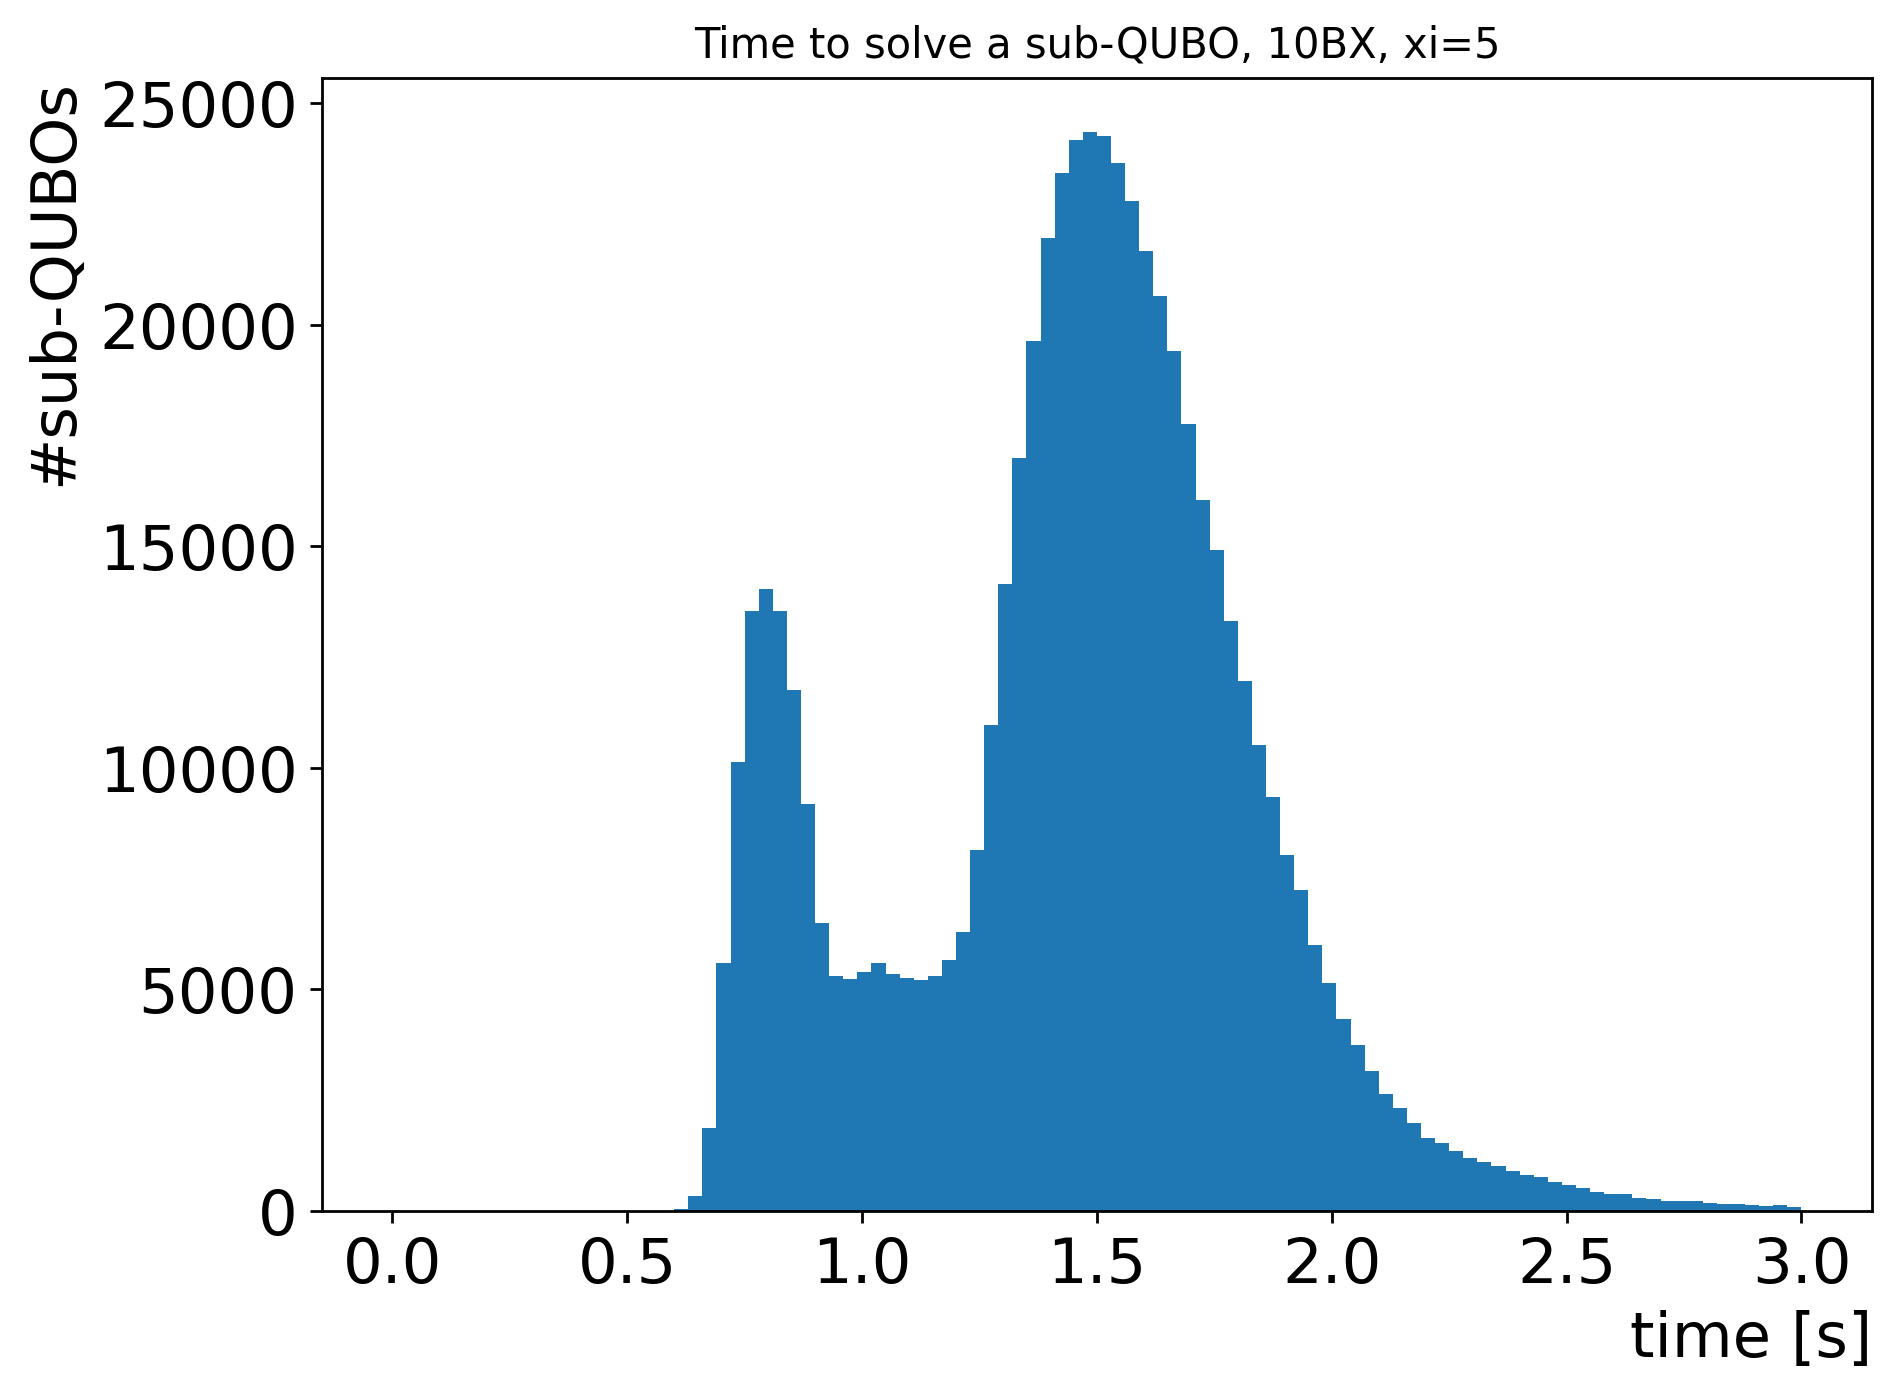

In [11]:
plt.figure(figsize=(8,6), dpi=250)
plt.hist([solving_time_subqubos_12q], bins=100, range=(0, 3))
plt.title("Time to solve a sub-QUBO, 10BX, xi=5")
plt.xlabel("time [s]", fontsize=18, loc="right")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("#sub-QUBOs", fontsize=18, loc="top")
plt.savefig("sub-QUBO_solving_time_hist.pdf", bbox_inches='tight')

In [29]:
len(solving_time_subqubos_3q)

1703897

In [ ]:
solving_success_3q = solving_success_subqubos_3q.count(True)
solving_success_5q = solving_success_subqubos_5q.count(True)
solving_success_7q = solving_success_subqubo7q_replace.count(True)
solving_success_10q = solving_success_subqubos_10q.count(True)
solving_success_12q = solving_success_subqubos_12q.count(True)



In [ ]:
plt.figure(figsize=(8,6), dpi=300)
plt.errorbar(x=subQUBO_size,
             y=[solving_success_3q / len(solving_success_subqubos_3q),
                solving_success_5q / len(solving_success_subqubos_5q),
                solving_success_7q / len(solving_success_subqubos_7q),
                solving_success_10q / len(solving_success_subqubos_10q),
                solving_success_12q / len(solving_success_subqubos_12q)],
             yerr=[np.sqrt(solving_success_3q) / len(solving_success_subqubos_3q),
                   np.sqrt(solving_success_5q) / len(solving_success_subqubos_5q),
                   np.sqrt(solving_success_7q) / len(solving_success_subqubos_7q),
                   np.sqrt(solving_success_10q) / len(solving_success_subqubos_10q),
                   np.sqrt(solving_success_12q) / len(solving_success_subqubos_12q)],
            label="VQE linear TwoLocal solved with NFT",
            linestyle="",
            marker="o")
plt.title(r"Average solving success of the sub-QUBOs for 10BX, $\xi=5$", fontsize=14)  
plt.legend(loc="best", fontsize=16)
plt.xticks([3, 5, 7, 10, 12],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("sub-QUBO size", fontsize=16, loc="right")
plt.ylabel("fraction of correctly solved sub-QUBOs", fontsize=16, loc="top")
plt.savefig("average_solving_success.pdf", bbox_inches='tight')

In [ ]:
len(cleaned)


In [ ]:
len(solving_time_subqubos_3q)

In [ ]:
type(True)

In [ ]:
solving_success_12q